## I will apply Random Forest and Grid Search CV models to our Absenteeism data.


In [1]:
#I will be comparing according to different ensemble models and different model selection methods during the application.
#I am importing the sklearn libraries that I will use 
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier


In [2]:
df = pd.read_csv("Absenteeism_binary.csv")
df.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Transportation Expense,Age,Body Mass Index,Education,Children,Pets,Excessive Absenteeism
0,0,0,0,1,7,289,33,30,0,2,1,1
1,0,0,0,0,7,118,50,31,0,1,0,0
2,0,0,0,1,7,179,38,31,0,0,0,0
3,1,0,0,0,7,279,39,24,0,2,0,1
4,0,0,0,1,7,289,33,30,0,2,1,0


In [5]:
#making x and y assignments ;
X = df.drop('Excessive Absenteeism',axis=1)
y = df['Excessive Absenteeism']
X_col=X.columns


In [6]:
# splitting into test and train sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,stratify=y)

In [7]:
#I'll fit 100 trees and bags; I want to create 100 separate decision trees and have them boostrap for bagging.
#i will try bagging instead of crossvalidation first
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, random_state=0,oob_score=True)
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  oob_score=True, random_state=0)

In [8]:
#checking the accuracies;
y_pred=bag.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, y_pred),'Oob Accuracy:',bag.oob_score_)

Test Accuracy: 0.7357142857142858 Oob Accuracy: 0.7410714285714286


Now I will apply the random forest classifier model. 

In [9]:
clf=RandomForestClassifier(random_state=0,n_estimators=100,oob_score=True)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, y_pred),'Oob Accuracy:',clf.oob_score_)

Test Accuracy: 0.7642857142857142 Oob Accuracy: 0.7464285714285714


We have achieved a better result than Bagging, the random technique has improved the ensemble technique.

In [10]:
#I'm trying to increase accuracy with different number of trees;

Oob_Accuracy=[]
for i in np.linspace(start = 50, stop = 500, num = 10):
    clf=RandomForestClassifier(random_state=0,n_estimators=int(i),oob_score=True)
    clf.fit(X_train,y_train)
    Oob_Accuracy.append([i,np.array(clf.oob_score_)])
df = pd.DataFrame(Oob_Accuracy,columns=['Number_of_Trees','Oob Accuracy'])
df

,Number_of_Trees,Oob Accuracy
0,50.0,0.7446428571428572
1,100.0,0.7464285714285714
2,150.0,0.7517857142857143
3,200.0,0.7482142857142857
4,250.0,0.7535714285714286
5,300.0,0.75
6,350.0,0.75
7,400.0,0.75
8,450.0,0.75
9,500.0,0.75


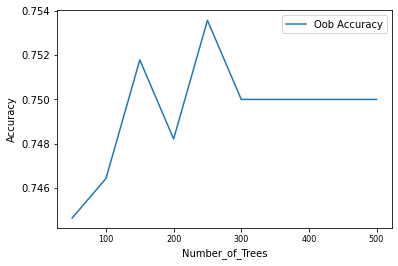

In [11]:
#Fitting more trees does not cause overfit, but here we see it has no effect.
#I want to see it on the chart as plot;
fig=plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(df['Number_of_Trees'].values,df['Oob Accuracy'].values,label = 'Oob Accuracy')
ax.set_xlabel('Number_of_Trees')
ax.set_ylabel('Accuracy')
ax.tick_params(axis='x', labelsize=8)
ax.legend(loc='best')

I will continue to estimate the number n by making 300 because as can be seen from the graph, it does not change after 300. 

In [12]:
clf=RandomForestClassifier(random_state=0,n_estimators=300,oob_score=True)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.75

In [148]:
#I will try a different number of features in each split;

Oob_Accuracy=[]
for i in range(1,9):
    clf=RandomForestClassifier(random_state=0,n_estimators=300,max_features=i,oob_score=True)
    clf.fit(X_train,y_train)
    Oob_Accuracy.append([i,np.array(clf.oob_score_)])
df = pd.DataFrame(Oob_Accuracy,columns=['Number_of_Features','Oob Accuracy'])
df

,Number_of_Features,Oob Accuracy
0,1,0.7392857142857143
1,2,0.7482142857142857
2,3,0.75
3,4,0.75
4,5,0.7482142857142857
5,6,0.7517857142857143
6,7,0.7464285714285714
7,8,0.7375


In [114]:
#Looking at the Accuracy results above, it is understood that 3 features are sufficient, I will measure the test performance;
clf=RandomForestClassifier(random_state=0,n_estimators=300,max_features=3,oob_score=True)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, y_pred))

Test Accuracy: 0.75


In [13]:
#splitting test and train set with changing random state 

X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10,stratify=y)

In [14]:
Oob_Accuracy=[]
for i in range(1,9):
    clf=RandomForestClassifier(random_state=0,n_estimators=300,max_features=i,oob_score=True)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    Oob_Accuracy.append([i,np.array(clf.oob_score_)])
df = pd.DataFrame(Oob_Accuracy,columns=['Number_of_Features','Oob Accuracy'])
df

,Number_of_Features,Oob Accuracy
0,1,0.7339285714285714
1,2,0.75
2,3,0.75
3,4,0.7589285714285714
4,5,0.7589285714285714
5,6,0.7589285714285714
6,7,0.7607142857142857
7,8,0.7535714285714286


In [15]:
#I will run it as max_features = 6 since the best value is out at 6; 
clf=RandomForestClassifier(random_state=0,n_estimators=300,max_features=6,oob_score=True)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, y_pred))

Test Accuracy: 0.75


In [16]:
#I will specify how many trees to create, and create the parameters grid to fit the model; 
clf=RandomForestClassifier(random_state=0)

n_estimators = [100,200,300,400,500,600]

max_features = [1,2,3,4,5,6,7,8]

params = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 }
params

{'n_estimators': [100, 200, 300, 400, 500, 600],
 'max_features': [1, 2, 3, 4, 5, 6, 7, 8]}

In [17]:
#grid search and crossvaliation for each parameter 
#I will say divide the train set into 5 parts and measure the accuracy of each with 4 by 1 variations;
clf_grid = GridSearchCV(estimator = clf, param_grid = params, 
                                cv = 5, verbose=2, scoring='accuracy',n_jobs = -1)
#fitting the model
clf_grid.fit(X_train, y_train)

print(clf_grid.best_params_)

#It will give me the best parameters and how many trees to create; 

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   50.5s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  1.3min finished


{'max_features': 4, 'n_estimators': 500}


In [154]:
clf=RandomForestClassifier(random_state=0,n_estimators=500,max_features=4,oob_score=True)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, y_pred))

Test Accuracy: 0.7357142857142858


In [155]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,stratify=y)

In [157]:
#After changing the train and test set, I apply Grid Search Crossvalidation;
clf_grid = GridSearchCV(estimator = clf, param_grid = params, 
                                cv = 5, verbose=2, scoring='accuracy',n_jobs = -1)

clf_grid.fit(X_train, y_train)

print(clf_grid.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  1.7min finished


{'max_features': 5, 'n_estimators': 300}


In [158]:
#5 and 300 are unchanged and accuracy will not change, but I'm still trying; 
clf=RandomForestClassifier(random_state=0,n_estimators=300,max_features=5,oob_score=True)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, y_pred))

Test Accuracy: 0.7428571428571429


The result is improving but still under 75%. Since it is random, I wonder if there are better outcome variations.

Now, instead of creating a single test set and looking through that test set, I want to crossvalidate the initial shredding.

I will create train and test sets 5 times and cross validate the tarin sets separately with grid search,

Let's do nested cross validation while creating the model again by selecting the best parameter from inside and using ** clf_girdbest to get the best performances and select the model in the train set;

5 fold, the best features will be found, then we will create a train test set again and find the best feature 5 times.


In [159]:
clf=RandomForestClassifier(random_state=0)
n_estimators = [100,200,300,400,500,600]
max_features = [1,2,3,4,5,6,7,8]

params = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 }
#usin cross validation
 
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, random_state=1, shuffle=True)
CVErrors=[]
for train_index, validation_index in cv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[validation_index], 
    y_train, y_test = y.iloc[train_index], y.iloc[validation_index]
    
    clf_grid = GridSearchCV(estimator = clf, param_grid = params, 
                                cv = 5, verbose=2, scoring='accuracy',n_jobs = -1)
   
    clf_grid.fit(X_train, y_train)
   
    print(clf_grid.best_params_)
    #fitting after best parameters
    clf=RandomForestClassifier(**clf_grid.best_params_)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    #Testin on test set
    CVErrors.append(accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   42.9s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  1.2min finished


{'max_features': 5, 'n_estimators': 100}
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  1.3min finished


{'max_features': 4, 'n_estimators': 100}
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  1.3min finished


{'max_features': 4, 'n_estimators': 300}
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   47.6s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  1.3min finished


{'max_features': 5, 'n_estimators': 600}
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   49.1s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  1.5min finished


{'max_features': 3, 'n_estimators': 200}


In [160]:
CVErrors

[0.7,
 0.7642857142857142,
 0.7357142857142858,
 0.7642857142857142,
 0.7357142857142858]

It can be said that when I fit the Random Forest model to this dataset, the success average that I can achieve with Cross Validation will be approximately 74%.

In [162]:
np.mean(CVErrors)

0.74

In [163]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,stratify=y)

In [165]:
# If I want to evaluate scoring on ROC;
clf_grid = GridSearchCV(estimator = clf, param_grid = params, 
                                cv = 5, verbose=2, scoring='roc_auc',n_jobs = -1)

clf_grid.fit(X_train, y_train)

print(clf_grid.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   44.9s


{'max_features': 8, 'n_estimators': 100}


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  1.2min finished


In [166]:
#it says 100 for the best feature. 
clf=RandomForestClassifier(random_state=0,n_estimators=100,max_features=8,oob_score=True)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[54, 22],
       [15, 49]])

In [167]:
#Looking at accuracy, I am looking for a better result with ROC;
clf=RandomForestClassifier(random_state=0,n_estimators=100,max_features=8,oob_score=True)
clf.fit(X_train,y_train)
y_pred_proba=np.array(clf.predict_proba(X_test))
y_pred_proba

array([[0.90720643, 0.09279357],
       [1.        , 0.        ],
       [0.97078571, 0.02921429],
       [0.59509524, 0.40490476],
       [0.98333333, 0.01666667],
       [0.01      , 0.99      ],
       [0.        , 1.        ],
       [0.94      , 0.06      ],
       [0.98      , 0.02      ],
       [0.995     , 0.005     ],
       [0.9505    , 0.0495    ],
       [0.76666667, 0.23333333],
       [0.90466667, 0.09533333],
       [0.51183333, 0.48816667],
       [0.99333333, 0.00666667],
       [0.        , 1.        ],
       [0.83      , 0.17      ],
       [0.65716667, 0.34283333],
       [0.9575    , 0.0425    ],
       [1.        , 0.        ],
       [0.7525    , 0.2475    ],
       [0.3025    , 0.6975    ],
       [0.98758333, 0.01241667],
       [0.01      , 0.99      ],
       [0.32975   , 0.67025   ],
       [0.96047619, 0.03952381],
       [0.4105    , 0.5895    ],
       [0.90454762, 0.09545238],
       [0.22291667, 0.77708333],
       [0.243     , 0.757     ],
       [0.

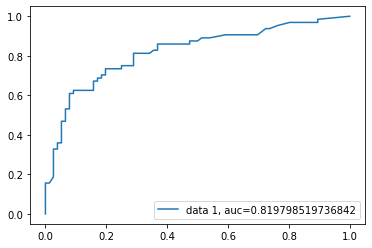

In [168]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:,1])
auc = roc_auc_score(y_test, y_pred_proba[:,1])
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC 0,82 başarılı sayılır.

In [169]:
# Let's take the importance of each feature;
feats = {} 
importances = clf.feature_importances_
clf.feature_importances_

array([0.10263954, 0.00905077, 0.07302421, 0.07980423, 0.31652953,
       0.15521983, 0.1039746 , 0.06884413, 0.0181511 , 0.0463476 ,
       0.02641446])

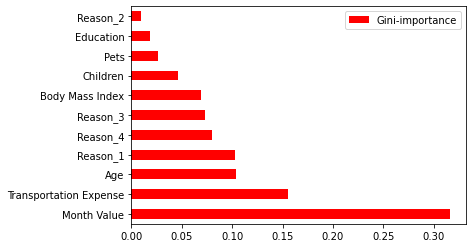

In [170]:
for feature, importance in zip(X_col, clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances = importances.sort_values(by='Gini-importance',ascending=False)
importances.plot.barh(color='r')

As can be seen from this graph, the variables that give us the highest information about absenteeism are seen as "Month Value", "Trasnsportation Expense", "Age", "Reason1" in order of importance. 


When the results of all models were examined, an average of approximately 75% correlation was found. Finally, the importance of the features can be observed on the Gini Chart.

As it can be understood from here, the Month Value value can be considered as a parallel high relationship with the summer months being a leave period.

From the impact of transportation costs on this issue, we should understand that absenteeism may decrease if the company tries to cover some or all of the transportation costs of the employees.

The increase in the average age and the relapse of major illnesses directly affect the absenteeism. In this context, if the company decreases the average age, the health problems will decrease indirectly and the absenteeism will decrease.